In [1]:
import numpy as np
from briefcase.case import Case
from briefcase.case_base import CaseBase
from briefcase.enums import incons_enum
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import TelcoConverter as TC
import seaborn as sns

import random
import yaml

importing Jupyter notebook from TelcoConverter.ipynb


In [5]:
def test_powers(data):
    cases = [Case.from_dict(c) for c in data]
    cb = CaseBase(cases)
    filtered_cases = cb.cases # filtered out the empty side cases
    powers = []
    for case in filtered_cases:
        power = cb.order.PD.case_power(case)
        powers.append(power)
        if power == 0: 
            print(case)
        
    print(powers)
    
    return powers
    
data = TC.get_existing_test_data()
powers = test_powers(data)

Loaded data successfully from 'data/telco-corr-test-0.25.yaml'
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case failed due to an empty side
Adding case faile

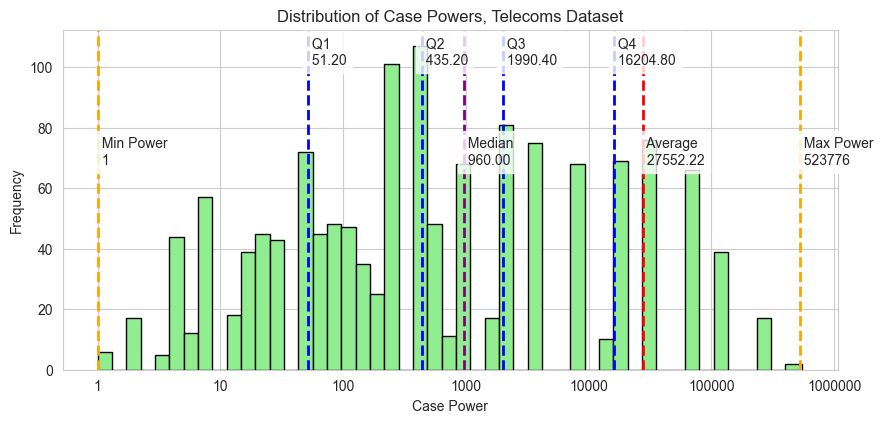

In [119]:
# Assuming 'powers' is your data
unique_powers, power_counts = np.unique(powers, return_counts=True)

# Calculate quintiles
power_quintiles = np.percentile(unique_powers, [20, 40, 60, 80])

# Calculate bin edges
bin_edges = np.logspace(np.log10(min(unique_powers)), np.log10(max(unique_powers)), 50)
bin_edges[-1] *= 1.05  # Extend the last bin to ensure it includes the maximum power value

# Plotting the histogram with a log scale on the x-axis
plt.figure(figsize=(10, 5))
plt.hist(powers, bins=bin_edges, color='lightgreen', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Case Powers, Telecoms Dataset')
plt.xlabel('Case Power')
plt.ylabel('Frequency')
plt.grid(True, axis='y')  # Grid on y-axis only for better visibility of frequencies

# Define tick positions for the x-axis
tick_positions = [1, 10, 100, 1000, 10000, 100000, 1000000]

# Set custom ticks and labels for the x-axis
plt.xticks(tick_positions, [str(int(tick)) for tick in tick_positions])

# Mark quintiles and their original power numbers
for quintile in power_quintiles:
    plt.axvline(quintile, color='blue', linestyle='dashed', linewidth=2)
    plt.text(quintile, 100, f' Q{np.where(power_quintiles == quintile)[0][0] + 1} \n {quintile:.2f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin

# Mark the average
power_average = np.mean(unique_powers)
plt.axvline(power_average, color='red', linestyle='dashed', linewidth=2)
plt.text(power_average, max(power_counts)+10, f' Average \n {power_average:.2f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

# Calculate median
power_median = np.median(unique_powers)
plt.axvline(power_median, color='purple', linestyle='dashed', linewidth=2)
plt.text(power_median, max(power_counts)+10, f' Median \n {power_median:.2f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

# Mark the maximum power possible
max_power = max(unique_powers)
plt.axvline(max_power, color='orange', linestyle='dashed', linewidth=2)
plt.text(max_power, max(power_counts)+10, f' Max Power \n {max_power}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

# Mark the minimum power possible
min_power = min(unique_powers)
plt.axvline(min_power, color='orange', linestyle='dashed', linewidth=2)
plt.text(min_power, max(power_counts)+10, f' Min Power \n {min_power}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [120]:
# Create a DataFrame with unique powers and their counts
data = {'Unique Powers': unique_powers, 'Power Counts': power_counts}
df = pd.DataFrame(data)
df

,Unique Powers,Power Counts
0,1,6
1,2,17
2,3,5
3,4,44
4,6,12
...,...,...
58,130560,30
59,130816,9
60,261632,16
61,261888,1


In [5]:
def test_admit_bf_incons(data, repeats=50):
    # Set the seed for reproducibility
    random.seed(42)
    scores = []
    powers = []
    for k in range(repeats+1):
        temp_data = data
        random.shuffle(temp_data)
        cb = CaseBase([])  
        score = 0
        for i in range(len(temp_data)):
            new_case = Case.from_dict(temp_data[i])
            if not cb.add_case(new_case, "NO"):
                score = i
                cb_power = cb.order.PD.cb_power()
                break
        powers.append(cb_power)
        scores.append(score)
        print(f"{k}: The number of cases we can admit before we create an inconsistency {score}")
        print(f"{k}: The power of case base before we create an inconsistency {cb_power}")
        print()
    
    return scores, powers
repeats = 1000
scores, powers = test_admit_bf_incons(TC.get_existing_test_data(), repeats)


Loaded data successfully from 'data/telco-corr-test-0.25.yaml'
0: The number of cases we can admit before we create an inconsistency 56
0: The power of case base before we create an inconsistency 50931
1: The number of cases we can admit before we create an inconsistency 28
1: The power of case base before we create an inconsistency 304338
2: The number of cases we can admit before we create an inconsistency 70
2: The power of case base before we create an inconsistency 283563

3: The number of cases we can admit before we create an inconsistency 17
3: The power of case base before we create an inconsistency 54208

4: The number of cases we can admit before we create an inconsistency 35
4: The power of case base before we create an inconsistency 161086

5: The number of cases we can admit before we create an inconsistency 15
5: The power of case base before we create an inconsistency 67819
6: The number of cases we can admit before we create an inconsistency 39
6: The power of case bas

In [6]:
import statistics

avg = round(sum(scores) / repeats)
std_dev = round(statistics.stdev(scores), 2)
print(f"Average cases before inconsistency ({repeats} trials): {avg}")
print(f"Standard deviation: {std_dev}")


avg = round(sum(powers) / repeats)
std_dev = round(statistics.stdev(powers), 2)
print(f"Average power score ({repeats} trials): {avg}")
print(f"Standard deviation: {std_dev}")

Average cases before inconsistency (1000 trials): 25
Standard deviation: 15.13
Average power score (1000 trials): 155127
Standard deviation: 121549.05


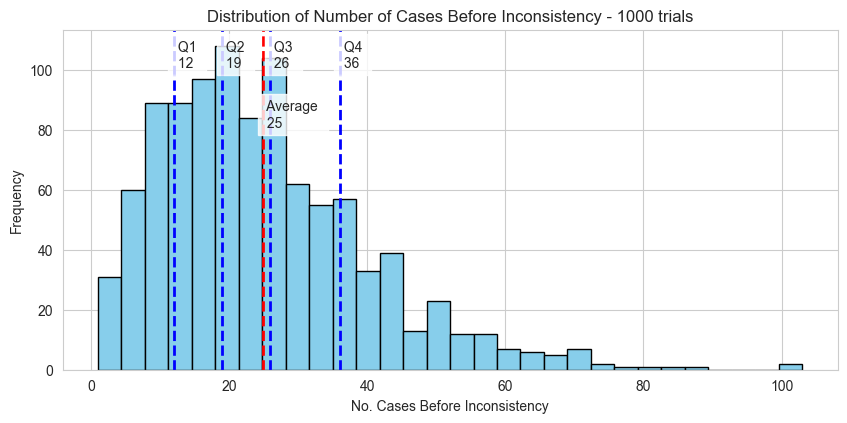

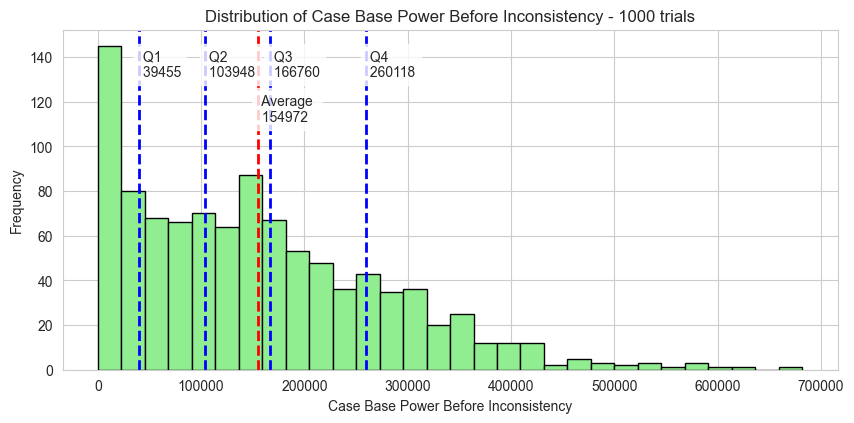

In [28]:
# Calculating quintiles
score_quintiles = np.percentile(scores, [20, 40, 60, 80])
power_quintiles = np.percentile(powers, [20, 40, 60, 80])

# Calculate averages
score_average = np.mean(scores)
power_average = np.mean(powers)

# Plotting inconsistency scores with quintiles
plt.figure(figsize=(10, 5))
plt.hist(scores, bins=30, color='skyblue', edgecolor='black')

# Mark quintiles and their original power numbers
for quintile in score_quintiles:
    plt.axvline(quintile, color='blue', linestyle='dashed', linewidth=2)
    plt.text(quintile, 100, f' Q{np.where(score_quintiles == quintile)[0][0] + 1} \n {quintile:.0f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))
plt.axvline(score_average, color='red', linestyle='dashed', linewidth=2)
plt.text(score_average, 80, f' Average \n {score_average:.0f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin

plt.title(f'Distribution of Number of Cases Before Inconsistency - {repeats} trials')
plt.xlabel('No. Cases Before Inconsistency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting power scores with quintiles
plt.figure(figsize=(10, 5))
plt.hist(powers, bins=30, color='lightgreen', edgecolor='black')

# Mark quintiles and their original power numbers
for quintile in power_quintiles:
    plt.axvline(quintile, color='blue', linestyle='dashed', linewidth=2)
    plt.text(quintile, 130, f' Q{np.where(power_quintiles == quintile)[0][0] + 1} \n {quintile:.0f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))
plt.axvline(power_average, color='red', linestyle='dashed', linewidth=2)
plt.text(power_average, 110, f' Average \n {power_average:.0f}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin

plt.title(f'Distribution of Case Base Power Before Inconsistency - {repeats} trials')
plt.xlabel('Case Base Power Before Inconsistency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()